Using the FT Global 500 data in the file ```FTGlobal.xls```:

1. Extract three clusters from the top 20 companies by market value that have complete data for each row. Use the following features: `Value`, `Turnover`, `Income`,    `Assets`,     `PE`,  `Yield`
2. Group the data by cluster and calculate the mean of the features
3. What do the clusters mean?
4. Change the number of clusters to 2 and then to 4. Does your interpretation of the data change?


In [8]:
import pandas as pd
import altair as alt
from sklearn.cluster import KMeans, DBSCAN
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [5]:
data=pd.read_excel('data/FTGlobal.xls', skiprows=4)

In [6]:
data.head()

,Global rank 2015,Global rank 2014,Company,Country,Market value $m,Sector,Turnover $m,Net income $m,Total assets $m,Employees,Price $,P/e ratio,Dividend yield (%),Year End
0,1.0,1.0,Apple,US,724773.1,Technology hardware & equipment,182795,39510.0,231839.0,92600.0,124.430,19.291473,1.454633,2014-09-27
1,2.0,2.0,Exxon Mobil,US,356548.7,Oil & gas producers,364763,32520.0,349493.0,75300.0,85.000,11.198946,3.176471,2014-12-31
2,3.0,5.0,Berkshire Hathaway,US,356510.7,Nonlife insurance,N/R,19872.0,526186.0,316000.0,217500.000,17.987709,NaN,2014-12-31
3,4.0,4.0,Google,US,345849.2,Software & computer services,66001,14444.0,131133.0,53600.0,554.700,26.389153,NaN,2014-12-31
4,5.0,3.0,Microsoft,US,333524.8,Software & computer services,86833,22074.0,172384.0,128000.0,40.655,15.458175,2.754889,2014-06-30


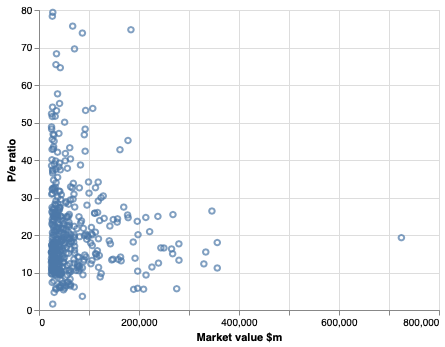

In [9]:
alt.Chart(data).mark_point().encode(
    x='Market value $m', y='P/e ratio'
)

In [10]:
kmeans = KMeans(n_clusters=2)

In [11]:
data2 = data.dropna()

In [12]:
X = data2[['Market value $m', 'P/e ratio']]

In [13]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
y_kmeans = kmeans.predict(X)

In [15]:
data2['cluster'] = y_kmeans

/Users/hanisaf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
data2.groupby('cluster')[['Market value $m', 'P/e ratio']].mean()

,Market value $m,P/e ratio
cluster,,
0,52846.117173,20.483123
1,223874.248537,18.081499


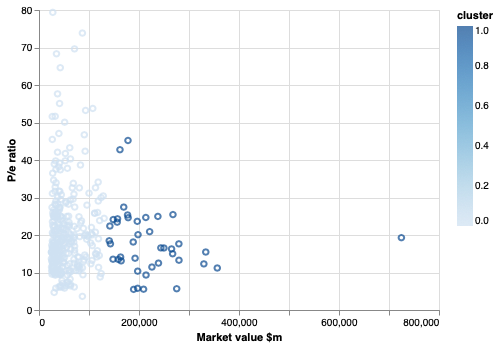

In [18]:
alt.Chart(data2).mark_point().encode(
    x='Market value $m', y='P/e ratio', color='cluster'
)

In [19]:
data2.columns

Index(['Global rank 2015', 'Global rank 2014', 'Company', 'Country',
       'Market value $m', 'Sector', 'Turnover $m', 'Net income $m',
       'Total assets $m', 'Employees', 'Price $', 'P/e ratio',
       'Dividend yield (%)', 'Year End ', 'cluster'],
      dtype='object')

In [28]:
data2['Turnover $m'] = pd.to_numeric(data2['Turnover $m'], errors='coerce')
data2 = data2.dropna()

/Users/hanisaf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
X = data2[['Market value $m', 'Turnover $m', 'Total assets $m', 'P/e ratio', 'Dividend yield (%)']]

In [47]:
kmeans = KMeans(n_clusters=5)



In [48]:
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
data2['cluster'] = y_kmeans

/Users/hanisaf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
data2.groupby('cluster')[X.columns].mean()

,Market value $m,Turnover $m,Total assets $m,P/e ratio,Dividend yield (%)
cluster,,,,,
0,51060.519053,27153.634475,36500.446867,22.794975,2.448466
1,221554.551111,334907.997778,362411.740000,15.315462,3.692088
2,72353.895200,90245.737800,128252.034400,17.765234,3.578196
3,213086.641579,84582.807895,153293.032105,19.203614,2.825547
4,724773.100000,182795.000000,231839.000000,19.291473,1.454633
